# Implementation 11 -  Principal Components Analysis

We will work again on the iris data set. We will use PCA to reduce the number of predictors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [3]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,virginica
13,4.3,3.0,1.1,0.1,setosa
62,6.0,2.2,4.0,1.0,versicolor
90,5.5,2.6,4.4,1.2,versicolor
88,5.6,3.0,4.1,1.3,versicolor


## Subject

Feature selection:
* Check visually the distribution of the data points on each individual axis (with colors corresponding to the specy).
* Which axis seems the most suitable for making clustering on one dimension, and why?
* Compute a k-Means with k=3 on two dimensions (i.e. with two predictors) and visualize the result.

Feature extraction:
* Compute a PCA on the 4 predictor dimensions in order to extract one unique dimension.
* Display the percentage of variance explained by each of the components.
* Check visually the distribution of the data points on each component axis (with colors corresponding to the specy).
* Plot the data points in the 2D plane made by the two principal components.
* Add the projection of the four original vectors (i.e. the four initial features) to that plane.
* Compute a k-Means with k=3 on the two principal components and visualize the result.


### Prepare data

In [4]:
y = dataset['species']

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dataset.drop('species', axis=1))
X = pd.DataFrame(data=X, columns=dataset.columns[:-1])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


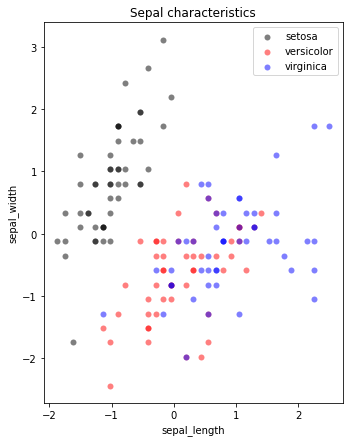

In [6]:
feature_x = 'sepal_length'
feature_y = 'sepal_width'

fig = plt.figure(figsize=(7,7))

for i, specy in enumerate(y.unique()):
    plt.scatter(X[y==specy][feature_x], X[y==specy][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

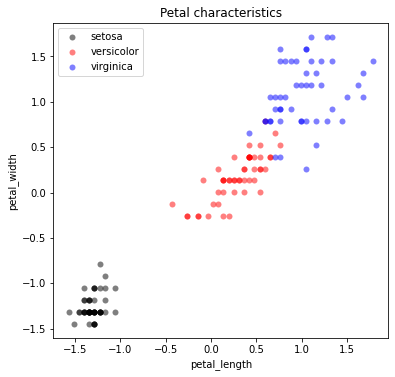

In [7]:
feature_x = 'petal_length'
feature_y = 'petal_width'

fig = plt.figure(figsize=(6,6))

for i, specy in enumerate(y.unique()):
    plt.scatter(X[y==specy][feature_x], X[y==specy][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

plt.title('Petal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

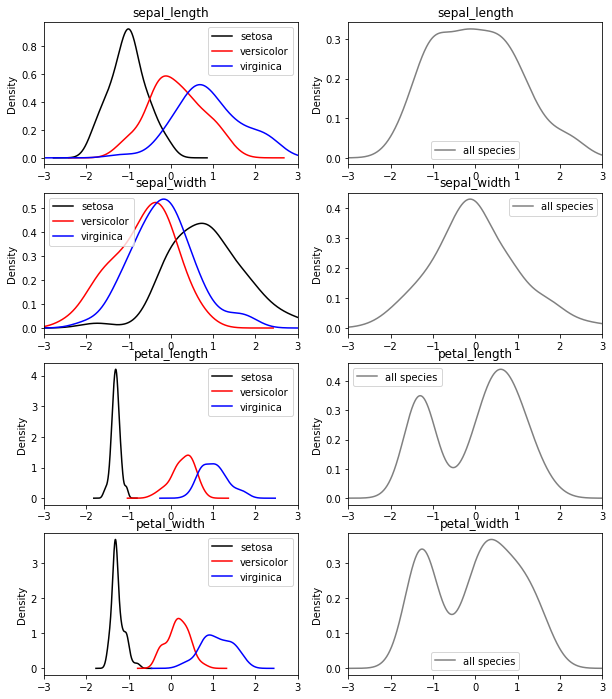

In [8]:
fig, axs = plt.subplots(4,2, figsize=(5*2,4*3))

# Loop on the predictors (on subplot for each feature)
for i_feature, feature in enumerate(X.columns):
    
    # Figures knowing the target labels
    for i_specy, specy in enumerate(y.unique()):
        X[y==specy][feature].plot(kind='density', color=['black', 'red', 'blue'][i_specy], label=specy, ax=axs[i_feature,0])
    axs[i_feature,0].set_title(feature)
    axs[i_feature,0].set_xlim([-3,3])
    axs[i_feature,0].legend()

    # Figures not knowing the target labels
    X[feature].plot(kind='density', color='grey', label='all species', ax=axs[i_feature,1])
    axs[i_feature,1].set_title(feature)
    axs[i_feature,1].set_xlim([-3,3])
    axs[i_feature,1].legend()
    
plt.show()

When we check the global data distribution on each dimension, i.e. without consideration of the different species (what we "really see" when we process a clustering), we notice that there is more separation on petal_length and petal_width axis (a discriminant analysis clustering would optimize that separations).
Note that since each axis has been standardized (feature scaling), we cannot consider the data spreading on each individual axis to make a selection.

### k-Means on one feature

Let's imagine that we have to keep one feature only and that we pick sepal width.

In [9]:
X_1d = dataset['sepal_width'].values.reshape(-1, 1)

In [10]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X_1d)

KMeans(n_clusters=3, random_state=0)

In [11]:
y_pred = kmeans.predict(X_1d)
print(y_pred)

[1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1
 0 0 1 1 2 0 1 1 0 1 0 1 0 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 0 0 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 2 0 1 0 2 0 2 2 0 2 2 2 0 0 0 2 0 0 2 0 0 0 0 2 0 2 1 0
 2 0 2 0 0 0 1 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 2 0 0 0 2 0
 1 0]


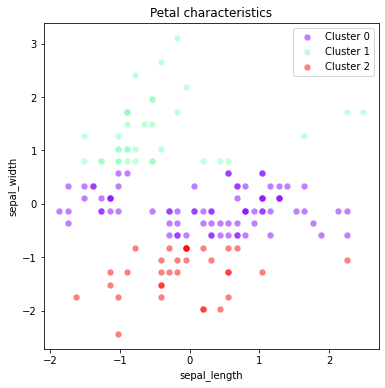

In [12]:
feature_x = 'sepal_length'
feature_y = 'sepal_width'

fig = plt.figure(figsize=(6,6))

color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X[y_pred == i][feature_x], X[y_pred == i][feature_y], s = 40, color = color_list(i), alpha=0.5, lw=0, label = 'Cluster ' + str(i))

plt.title('Petal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

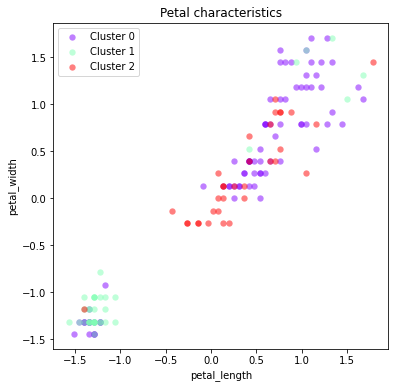

In [13]:
feature_x = 'petal_length'
feature_y = 'petal_width'

fig = plt.figure(figsize=(6,6))

color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X[y_pred == i][feature_x], X[y_pred == i][feature_y], s = 40, color = color_list(i), alpha=0.5, lw=0, label = 'Cluster ' + str(i))

    
plt.title('Petal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

### PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [15]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

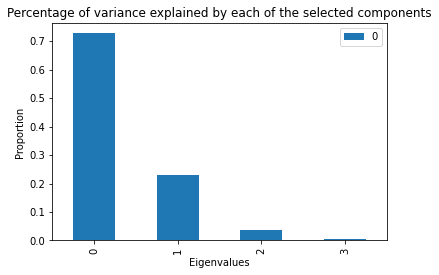

In [16]:
pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('Eigenvalues')
plt.ylabel('Proportion')
plt.title('Percentage of variance explained by each of the selected components')
plt.show()

In [17]:
X_pca = pca.transform(X)

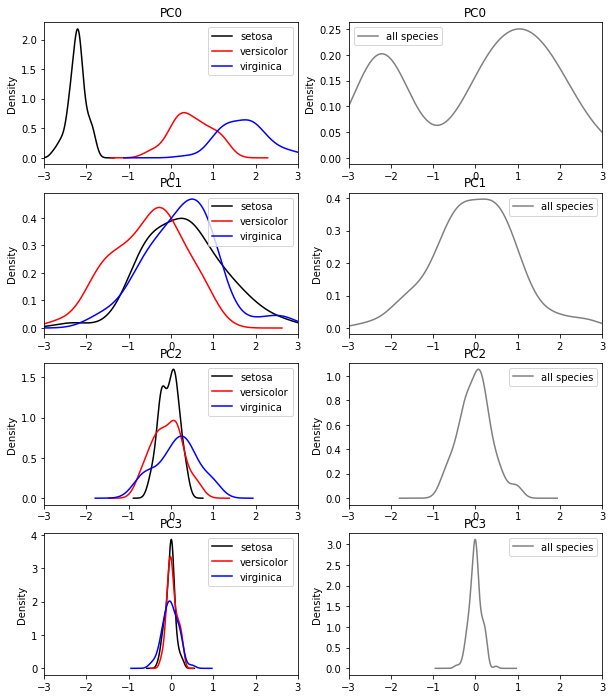

In [18]:
fig, axs = plt.subplots(4,2, figsize=(5*2,4*3))

# Loop on the predictors (on subplot for each feature)
for i_feature in range(pca.n_components_):
    
    # Figures knowing the target labels
    for i_specy, specy in enumerate(y.unique()):
        pd.DataFrame(data=X_pca[y==specy,i_feature], columns=[specy]).plot(kind='density', color=['black', 'red', 'blue'][i_specy], ax=axs[i_feature,0])
    axs[i_feature,0].set_title('PC'+str(i_feature))
    axs[i_feature,0].set_xlim([-3,3])
    axs[i_feature,0].legend()

    # Figures not knowing the target labels
    pd.DataFrame(data=X_pca[:,i_feature], columns=['all species']).plot(kind='density', color='grey', ax=axs[i_feature,1])
    axs[i_feature,1].set_title('PC'+str(i_feature))
    axs[i_feature,1].set_xlim([-3,3])
    axs[i_feature,1].legend()
    
plt.show()

In [19]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [20]:
print(X.columns.values)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


In [21]:
X_pca[:10,:]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729],
       [-2.07053681,  1.51854856,  0.03068426, -0.00439877],
       [-2.44571134,  0.07456268,  0.34219764,  0.03809657],
       [-2.23384186,  0.24761393, -0.08257446,  0.02550516],
       [-2.34195768, -1.09514636,  0.1535624 ,  0.02679383],
       [-2.18867576, -0.44862905, -0.24655952,  0.0399073 ]])

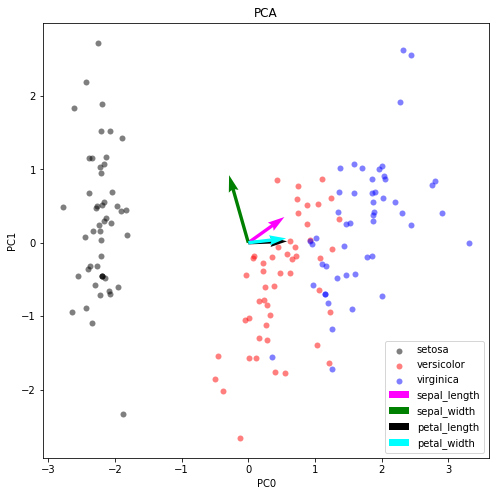

In [22]:
fig = plt.figure(figsize=(8,8))

for i, specy in enumerate(y.unique()):
    plt.scatter(X_pca[dataset['species']==specy,0], X_pca[dataset['species']==specy,1], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

for i_feature, feature in enumerate(X.columns):
    plt.quiver(pca.components_[0,i_feature], pca.components_[1,i_feature], scale=1, scale_units='xy', label = feature, color = ['magenta', 'green', 'black', 'cyan'][i_feature])

plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()

### PCA with one component

In [23]:
pca_1d = PCA(n_components = 1)
X_pca_1d = pca_1d.fit_transform(X)

In [24]:
pca_1d.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105]])

In [25]:
X_pca_1d[:10,:]

array([[-2.26454173],
       [-2.0864255 ],
       [-2.36795045],
       [-2.30419716],
       [-2.38877749],
       [-2.07053681],
       [-2.44571134],
       [-2.23384186],
       [-2.34195768],
       [-2.18867576]])

In [26]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X_pca_1d)

KMeans(n_clusters=3, random_state=0)

In [27]:
y_pred = kmeans.predict(X_pca_1d)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2]


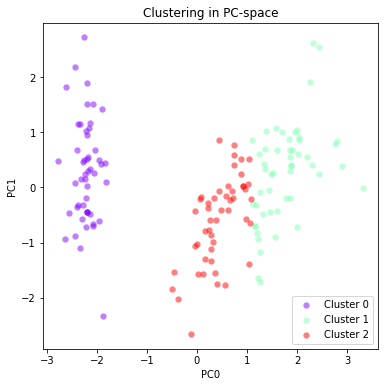

In [28]:
fig = plt.figure(figsize=(6,6))

color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X_pca[y_pred == i,0], X_pca[y_pred == i,1], s = 40, color = color_list(i), alpha=0.5, lw=0, label = 'Cluster ' + str(i))

plt.title('Clustering in PC-space')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()

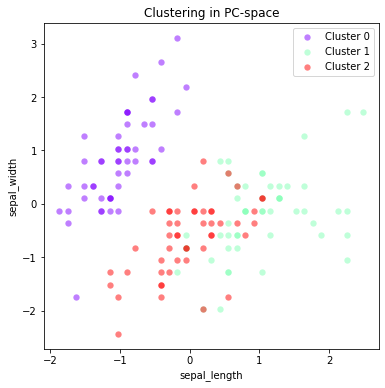

In [29]:
feature_x = 'sepal_length'
feature_y = 'sepal_width'

fig = plt.figure(figsize=(6,6))

color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X[y_pred == i][feature_x], X[y_pred == i][feature_y], s = 40, color = color_list(i), alpha=0.5, lw=0, label = 'Cluster ' + str(i))

    
plt.title('Clustering in PC-space')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

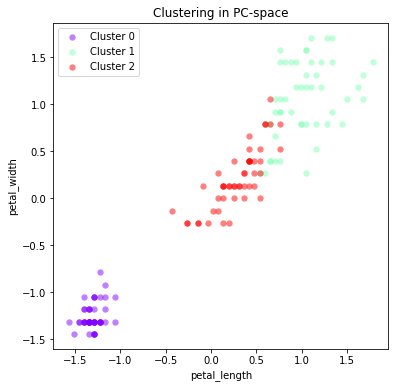

In [30]:
feature_x = 'petal_length'
feature_y = 'petal_width'

fig = plt.figure(figsize=(6,6))

color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X[y_pred == i][feature_x], X[y_pred == i][feature_y], s = 40, color = color_list(i), alpha=0.5, lw=0, label = 'Cluster ' + str(i))

    
plt.title('Clustering in PC-space')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()